In [1]:
!pip install quantstats emd


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

from mlfinlab.funtions.imos_transform import imos_transform
from mlfinlab.funtions.imfs import decompose_imfs

In [3]:
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('META')

[*********************100%%**********************]  1 of 1 completed


In [4]:
s = (stock+1).fillna(1).cumprod()

<Axes: xlabel='Date'>

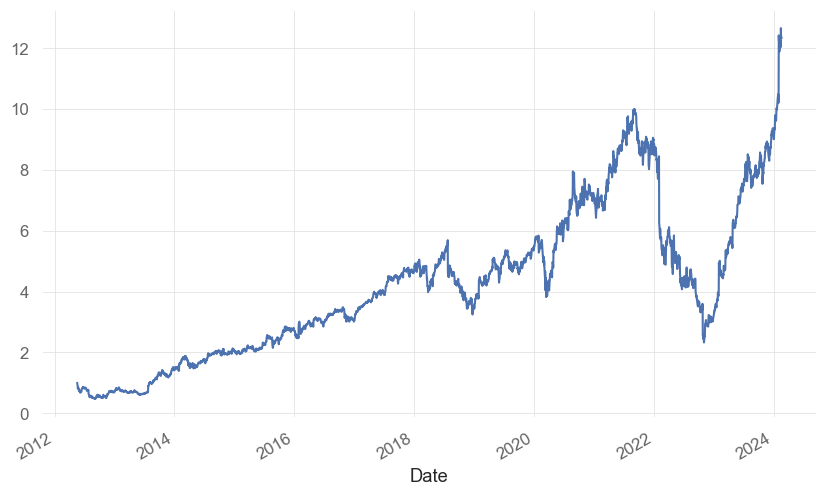

In [5]:
s.plot()

In [6]:
z, _ = imos_transform(s.pct_change())
z

Date
2012-05-18         NaN
2012-05-21         NaN
2012-05-22         NaN
2012-05-23         NaN
2012-05-24         NaN
                ...   
2024-02-13    1.904525
2024-02-14    1.935632
2024-02-15    2.057668
2024-02-16    2.043271
2024-02-20    2.067991
Name: Close, Length: 2957, dtype: float64

In [7]:
imfs = decompose_imfs(z.dropna(), max_imf=-1)
d = pd.DataFrame(np.diff(imfs.values, axis=0), columns=imfs.columns, index=imfs.index[1:])

In [8]:
d

,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6
Date,,,,,,,
2014-06-04,0.076689,-0.014612,0.006034,0.003097,0.002488,-0.000591,0.000500
2014-06-05,-0.114307,-0.002518,0.008759,0.003880,0.002315,-0.000599,0.000500
2014-06-06,-0.028427,0.005454,0.009905,0.004440,0.002140,-0.000608,0.000500
2014-06-09,0.026829,0.007767,0.009354,0.004775,0.001963,-0.000617,0.000500
2014-06-10,0.097577,0.006262,0.007096,0.004887,0.001784,-0.000625,0.000500
...,...,...,...,...,...,...,...
2024-02-13,-0.043611,0.000735,-0.004305,0.002142,-0.000492,0.000128,0.000136
2024-02-14,-0.033426,0.064477,0.000055,0.000342,-0.000607,0.000128,0.000137
2024-02-15,0.049578,0.070654,0.003644,-0.001388,-0.000718,0.000128,0.000138


<Axes: xlabel='Date'>

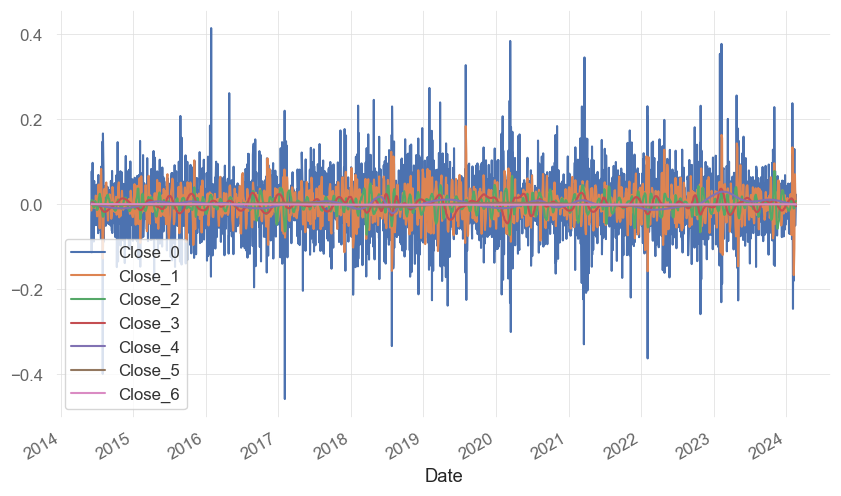

In [9]:
d.plot()

<Axes: xlabel='Date'>

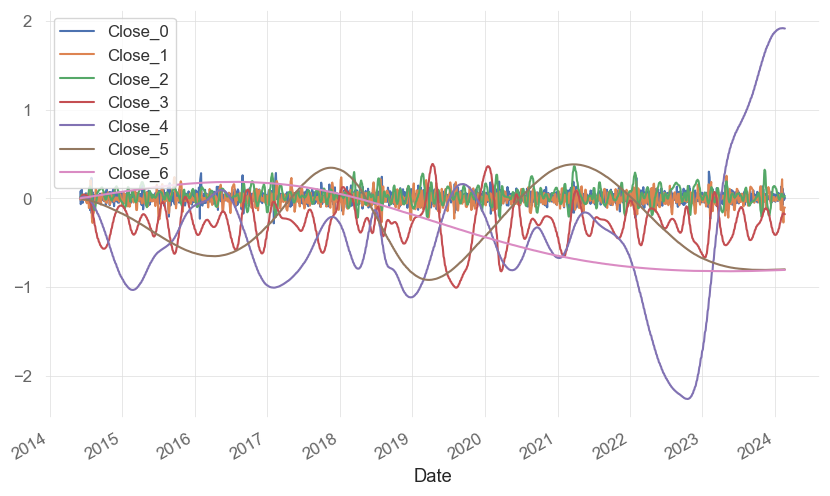

In [10]:
d.cumsum().plot()